In [2]:
from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm


In [3]:
from scipy.stats import bernoulli

In [4]:
sample_size = 100
p = 0.26
sample = bernoulli.rvs(p, size=sample_size)
print("Number of Black jurors:", sum(sample))

Number of Black jurors: 26


In [5]:
def one_simulated_count(p=0.26, sample_size=100):
    return sum(bernoulli.rvs(p, size=sample_size))


In [6]:
print("Number of Black jurors:", one_simulated_count())

Number of Black jurors: 25


In [7]:
counts = []
repetitions = 10000
for i in np.arange(repetitions):
    counts.append(one_simulated_count())

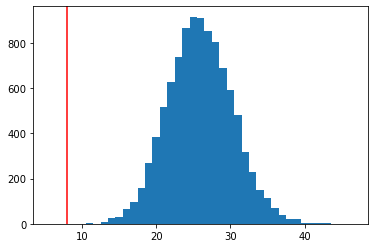

In [8]:
bins = np.arange(5.5, 46.6, 1)
plt.hist(counts, bins=bins)
plt.axvline(x=8, color='r')

In [9]:
eight_or_less = [x for x in counts if x <= 8]
print("Number of panels with 8 or less Black jurors:", len(eight_or_less))

Number of panels with 8 or less Black jurors: 0


## Usando a Binomial

In [10]:
from scipy.stats import binom

In [11]:
r = binom.rvs(sample_size, p, size=repetitions)

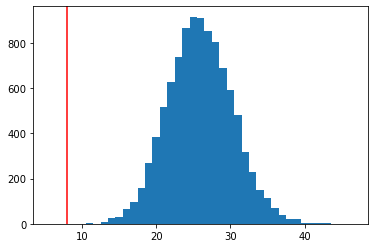

In [12]:
bins = np.arange(5.5, 46.6, 1)
plt.hist(counts, bins=bins)
plt.axvline(x=8, color='r')

In [13]:
prob = binom.cdf(8, 100, 0.26)
print(prob)

4.734794997889311e-06


In [14]:
eight_or_less = [x for x in counts if x <= 8]
print("Number of panels with 8 or less Black jurors:", len(eight_or_less))

Number of panels with 8 or less Black jurors: 0


# Múltiplas categorias

In [15]:
jury = pd.DataFrame(
    {'Ethnicity': ['Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'],
    'Eligible': [0.15, 0.18, 0.54, 0.12, 0.01],
    'Panels': [0.26, 0.08, 0.54, 0.08, 0.04]}
)



jury

,Ethnicity,Eligible,Panels
0,Asian/PI,0.15,0.26
1,Black/AA,0.18,0.08
2,Caucasian,0.54,0.54
3,Hispanic,0.12,0.08
4,Other,0.01,0.04


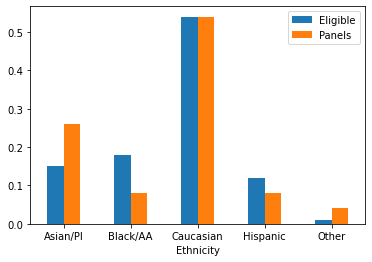

In [16]:
ax = jury.set_index('Ethnicity').plot.bar(rot=0)

## Comparação com painéis selecionados aleatoriamente

In [17]:
from scipy.stats import multinomial

In [18]:
def sample_proportions(n, p):
    r = multinomial.rvs(n, p)
    return r/n

In [19]:
random_prop = sample_proportions(1453, jury['Eligible'].values)
random_prop

array([0.14728149, 0.18169305, 0.53613214, 0.12594632, 0.00894701])

In [20]:
jury_with_sample = jury.copy()
jury_with_sample['Random Sample'] = random_prop

In [21]:
jury_with_sample

,Ethnicity,Eligible,Panels,Random Sample
0,Asian/PI,0.15,0.26,0.147281
1,Black/AA,0.18,0.08,0.181693
2,Caucasian,0.54,0.54,0.536132
3,Hispanic,0.12,0.08,0.125946
4,Other,0.01,0.04,0.008947


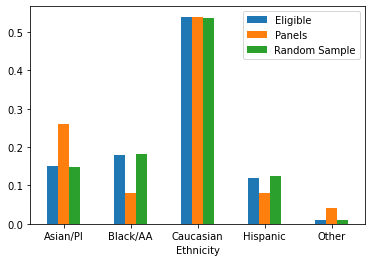

In [22]:
ax = jury_with_sample.set_index('Ethnicity').plot.bar(rot=0)

### Cálculo da diferença entre proporções

In [23]:
jury_with_diffs = jury.copy()
jury_with_diffs['Difference'] = jury['Panels'] - jury['Eligible']
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference
0,Asian/PI,0.15,0.26,0.11
1,Black/AA,0.18,0.08,-0.10
2,Caucasian,0.54,0.54,0.00
3,Hispanic,0.12,0.08,-0.04
4,Other,0.01,0.04,0.03


In [24]:
jury_with_diffs['Absolute Difference'] = jury_with_diffs['Difference'].abs()
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference,Absolute Difference
0,Asian/PI,0.15,0.26,0.11,0.11
1,Black/AA,0.18,0.08,-0.10,0.10
2,Caucasian,0.54,0.54,0.00,0.00
3,Hispanic,0.12,0.08,-0.04,0.04
4,Other,0.01,0.04,0.03,0.03


In [25]:
jury_with_diffs['Absolute Difference'].sum() / 2

0.14

In [26]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [27]:
tvd_real = total_variation_distance(jury['Panels'],jury['Eligible'])
print("total variation distance: ", tvd_real)

total variation distance:  0.14


In [28]:
eligible_population = jury['Eligible'].values
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.017783895388850647

### Simulando um valor da estatística

In [29]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)  

### Simulando vários valores da estatística

In [30]:
tvds = []
repetitions = 50000
for i in np.arange(repetitions):
    tvds.append(one_simulated_tvd())

In [31]:
tvds

[0.018692360633172762,
 0.019848589125946288,
 0.017859600825877488,
 0.03365450791465931,
 0.023331039229181005,
 0.008836889194769422,
 0.015581555402615303,
 0.018506538196834097,
 0.014239504473503119,
 0.013778389538885032,
 0.021403991741225054,
 0.006125258086717119,
 0.010027529249827978,
 0.011913282863041948,
 0.014384033035099754,
 0.018245010323468716,
 0.034886441844459756,
 0.013289745354439088,
 0.018107364074328967,
 0.016992429456297312,
 0.015567790777701323,
 0.024053682037164452,
 0.01658637302133516,
 0.012092222986923615,
 0.019483826565726052,
 0.019855471438403296,
 0.01616655196145904,
 0.0175017205781142,
 0.015437026841018544,
 0.021596696490020623,
 0.021665519614590466,
 0.01683413626978668,
 0.01828630419821064,
 0.02375774260151412,
 0.018596008258774933,
 0.015567790777701316,
 0.020598761183757742,
 0.009421885753613258,
 0.0048313833448038156,
 0.030392291810048197,
 0.01756366139022711,
 0.017171369580178925,
 0.009242945629731549,
 0.0162216104611149

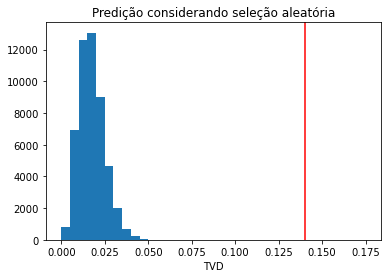

In [32]:
bins=np.arange(0, 0.18, 0.005)
plt.hist(tvds, bins=bins)
plt.xlabel('TVD')
plt.title('Predição considerando seleção aleatória')
plt.axvline(x=tvd_real, color='r')

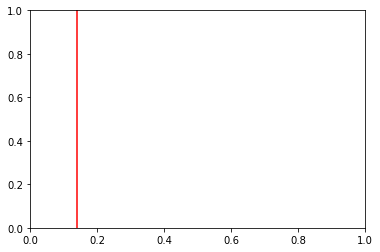

In [33]:
plt.axvline(x=tvd_real, color='r')

In [34]:
lista_maiores = [a for a in tvds if a >= 0.14]

In [35]:
len(lista_maiores)

0

# Decisões e Incertezas

In [36]:
705 / 929

0.7588805166846071

In [37]:
observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

In [38]:
mendel_proportions = [0.75, 0.25]
mendel_proportion_purple = mendel_proportions[0]
sample_size = 929

In [39]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(sample_size, mendel_proportions)[0]
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)


In [40]:
repetitions = 10000
distances = []
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

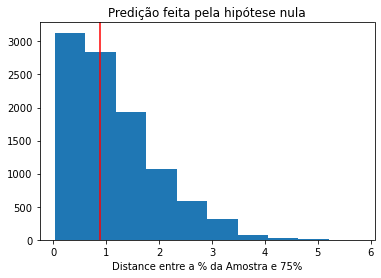

In [41]:
plt.hist(distances)
plt.xlabel('Distance entre a % da Amostra e 75%')
plt.title('Predição feita pela hipótese nula')
plt.axvline(x=observed_statistic, color='r')



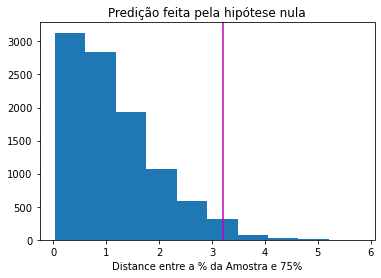

In [42]:
different_observed_statistic = 3.2
plt.hist(distances)
plt.xlabel('Distance entre a % da Amostra e 75%')
plt.title('Predição feita pela hipótese nula')
plt.axvline(x=different_observed_statistic, color='m')



In [43]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0256

**Exercício 1:** Qual é valor para a estatística observada?

In [44]:
np.count_nonzero(distances >= observed_statistic) / repetitions

0.5507

**Exercício 2:** Como usar a distribuição binomial para verificar se o número de plantas com flores brancas observado é um valor extremo?

In [45]:
k = 905
n = 929
p = 0.75

prob = 1-binom.cdf(k, 929, 0.75)
print(prob)

1.1102230246251565e-16


# Probabilidades de Erro

In [46]:
def simula_moeda(p, n):
    return sum(bernoulli.rvs(p, size=n))

(array([1507., 1202.,  932.,  617.,  382.,  234.,   80.,   30.,   13.,
           3.]),
 array([ 0. ,  8.2, 16.4, 24.6, 32.8, 41. , 49.2, 57.4, 65.6, 73.8, 82. ]),
 <BarContainer object of 10 artists>)

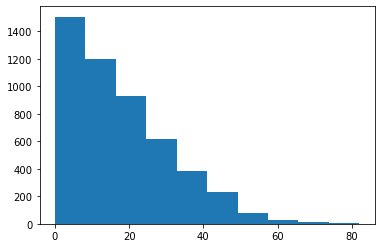

In [48]:
repetitions = 5000
num_tosses = 2000
p = 0.5

difs = list()
for i in range(repetitions):
    s = np.abs(simula_moeda(p, num_tosses) - 1000)
    difs.append(s)

plt.hist(difs)

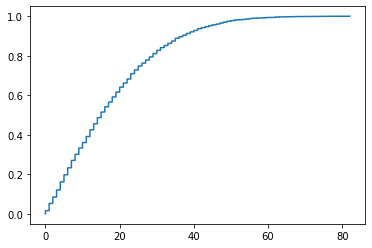

In [51]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(difs)
plt.plot(ecdf.x, ecdf.y)

In [57]:
values = ecdf.x[::-1]
limiar = values[0]

for x in values[1:]:
    if 1-ecdf(x) > 0.05:
        break
    limiar = x
print(limiar, 1-ecdf(limiar))


44.0 0.047799999999999954
